In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df = df.replace(-9999, np.nan)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked'],axis=1)

In [4]:
print('Rows in the data frame: {0}'.format(len(df)))
print('Rows without NAN: {0}'.format(len(df.dropna(how='any'))))

Rows in the data frame: 891
Rows without NAN: 714


In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [6]:
df.Age[df.Age.isnull()] = df.Age.mean()

<ipython-input-6-97e9eb0f1119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[df.Age.isnull()] = df.Age.mean()


In [7]:
print('Rows in the data frame: {0}'.format(len(df)))
print('Rows without NAN: {0}'.format(len(df.dropna(how='any'))))

Rows in the data frame: 891
Rows without NAN: 891


Отлично, у нас нет пропущеных значений!
Нормализуем данные

In [8]:
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

df = sex_to_int(df)
df['Sex']=df['Sex'].astype(float)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1.0,22.0,1,0,7.2500
1,1,1,0.0,38.0,1,0,71.2833
2,1,3,0.0,26.0,0,0,7.9250
3,1,1,0.0,35.0,1,0,53.1000
4,0,3,1.0,35.0,0,0,8.0500


In [9]:
from sklearn.preprocessing import MinMaxScaler
def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
df = normalize_age(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1.0,0.271174,1,0,7.2500
1,1,1,0.0,0.472229,1,0,71.2833
2,1,3,0.0,0.321438,0,0,7.9250
3,1,1,0.0,0.434531,1,0,53.1000
4,0,3,1.0,0.434531,0,0,8.0500


In [10]:
def normalize_data(data):
    mx=data.max()
    data = data/mx
    print(data)
    data = data.astype(float)
    return data
df['Pclass'] =normalize_data(df['Pclass'])
df['SibSp'] = normalize_data(df['SibSp'])
df['Parch'] = normalize_data(df['Parch'])
df['Fare'] = normalize_data(df['Fare'])
df.head()

0      1.000000
1      0.333333
2      1.000000
3      0.333333
4      1.000000
         ...   
886    0.666667
887    0.333333
888    1.000000
889    0.333333
890    1.000000
Name: Pclass, Length: 891, dtype: float64
0      0.125
1      0.125
2      0.000
3      0.125
4      0.000
       ...  
886    0.000
887    0.000
888    0.125
889    0.000
890    0.000
Name: SibSp, Length: 891, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
886    0.000000
887    0.000000
888    0.333333
889    0.000000
890    0.000000
Name: Parch, Length: 891, dtype: float64
0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1.000000,1.0,0.271174,0.125,0.0,0.014151
1,1,0.333333,0.0,0.472229,0.125,0.0,0.139136
2,1,1.000000,0.0,0.321438,0.000,0.0,0.015469
3,1,0.333333,0.0,0.434531,0.125,0.0,0.103644
4,0,1.000000,1.0,0.434531,0.000,0.0,0.015713


In [11]:
X = df.drop('Survived',axis = 1).copy()
y = df['Survived'].copy()
print(X.shape)
print(y.shape)

(891, 6)
(891,)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Считаем качество модели (коэффициент  𝑅2 ).

In [14]:
print('R^2: {0}'.format(model.score(X, y)))

R^2: 0.3949290844484469


Выведем регрессионные коэффициенты от метода model.coef_ и свободный член от метода model.intercept_.

In [15]:
coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,1.296983
1,Pclass,-0.510008
2,Sex,-0.512349
3,Age,-0.467239
4,SibSp,-0.346978
5,Parch,-0.119536
6,Fare,0.211825


Теперь испробуем полиномиальную

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(
                          # Максимальная степень
                          degree=10,
                          # Не генерировать свободный член
                          include_bias=False)
x_poly_Pclass = poly.fit_transform(X['Pclass'].values.reshape(-1,1))
x_poly_Pclass = pd.DataFrame(x_poly_Pclass, columns=['Pclass', 
                                       'Pclass^2', 
                                       'Pclass^3',
                                       'Pclass^4',
                                       'Pclass^5',
                                       'Pclass^6',
                                       'Pclass^7',
                                       'Pclass^8',
                                       'Pclass^9',
                                       'Pclass^10'])
x_poly_Sex = poly.fit_transform(X['Sex'].values.reshape(-1,1))
x_poly_Sex = pd.DataFrame(x_poly_Sex, columns=['Sex', 
                                       'Sex^2', 
                                       'Sex^3',
                                       'Sex^4',
                                       'Sex^5',
                                       'Sex^6',
                                       'Sex^7',
                                       'Sex^8',
                                       'Sex^9',
                                       'Sex^10'])
x_poly_Age = poly.fit_transform(X['Age'].values.reshape(-1,1))
x_poly_Age = pd.DataFrame(x_poly_Age, columns=['Age', 
                                       'Age^2', 
                                       'Age^3',
                                       'Age^4',
                                       'Age^5',
                                       'Age^6',
                                       'Age^7',
                                       'Age^8',
                                       'Age^9',
                                       'Age^10'])
x_poly_SibSp = poly.fit_transform(X['SibSp'].values.reshape(-1,1))
x_poly_SibSp = pd.DataFrame(x_poly_SibSp, columns=['SibSp', 
                                       'SibSp^2', 
                                       'SibSp^3',
                                       'SibSp^4',
                                       'SibSp^5',
                                       'SibSp^6',
                                       'SibSp^7',
                                       'SibSp^8',
                                       'SibSp^9',
                                       'SibSp^10'])
x_poly_Parch = poly.fit_transform(X['Parch'].values.reshape(-1,1))
x_poly_Parch = pd.DataFrame(x_poly_Parch, columns=['Parch', 
                                       'Parch^2', 
                                       'Parch^3',
                                       'Parch^4',
                                       'Parch^5',
                                       'Parch^6',
                                       'Parch^7',
                                       'Parch^8',
                                       'Parch^9',
                                       'Parch^10'])
x_poly_Fare = poly.fit_transform(X['Fare'].values.reshape(-1,1))
x_poly_Fare = pd.DataFrame(x_poly_Fare, columns=['Fare', 
                                       'Fare^2', 
                                       'Fare^3',
                                       'Fare^4',
                                       'Fare^5',
                                       'Fare^6',
                                       'Fare^7',
                                       'Fare^8',
                                       'Fare^9',
                                       'Fare^10'])

In [17]:
#X_final = np.append(x_poly_Pclass, x_poly_Sex, axis = 1)
#X_final = np.append(X_final, x_poly_Age, axis = 1)
#X_final = np.append(X_final, x_poly_SibSp, axis = 1)
#X_final = np.append(X_final, x_poly_Parch, axis = 1)
#X_final = np.append(X_final, x_poly_Fare, axis = 1)

#В такой вариации сумм полиномов R2 на процент ниже

In [18]:
poly1 = np.array([
    x_poly_Pclass['Pclass'],
    x_poly_Sex['Sex'],
    x_poly_Age['Age'],
    x_poly_SibSp['SibSp'],
    x_poly_Parch['Parch'],
    x_poly_Fare['Fare']]).T

poly2 = np.array([
    x_poly_Pclass['Pclass^2'],
    x_poly_Sex['Sex^2'],
    x_poly_Age['Age^2'],
    x_poly_SibSp['SibSp^2'],
    x_poly_Parch['Parch^2'],
    x_poly_Fare['Fare^2']]).T

poly3 = np.array([
    x_poly_Pclass['Pclass^3'],
    x_poly_Sex['Sex^3'],
    x_poly_Age['Age^3'],
    x_poly_SibSp['SibSp^3'],
    x_poly_Parch['Parch^3'],
    x_poly_Fare['Fare^3']]).T

poly4 = np.array([
    x_poly_Pclass['Pclass^4'],
    x_poly_Sex['Sex^4'],
    x_poly_Age['Age^4'],
    x_poly_SibSp['SibSp^4'],
    x_poly_Parch['Parch^4'],
    x_poly_Fare['Fare^4']]).T

poly5 = np.array([
    x_poly_Pclass['Pclass^5'],
    x_poly_Sex['Sex^5'],
    x_poly_Age['Age^5'],
    x_poly_SibSp['SibSp^5'],
    x_poly_Parch['Parch^5'],
    x_poly_Fare['Fare^5']]).T

poly6 = np.array([
    x_poly_Pclass['Pclass^6'],
    x_poly_Sex['Sex^6'],
    x_poly_Age['Age^6'],
    x_poly_SibSp['SibSp^6'],
    x_poly_Parch['Parch^6'],
    x_poly_Fare['Fare^6']]).T

poly7 = np.array([
    x_poly_Pclass['Pclass^7'],
    x_poly_Sex['Sex^7'],
    x_poly_Age['Age^7'],
    x_poly_SibSp['SibSp^7'],
    x_poly_Parch['Parch^7'],
    x_poly_Fare['Fare^7']]).T

poly8 = np.array([
    x_poly_Pclass['Pclass^8'],
    x_poly_Sex['Sex^8'],
    x_poly_Age['Age^8'],
    x_poly_SibSp['SibSp^8'],
    x_poly_Parch['Parch^8'],
    x_poly_Fare['Fare^8']]).T

poly9 = np.array([
    x_poly_Pclass['Pclass^9'],
    x_poly_Sex['Sex^9'],
    x_poly_Age['Age^9'],
    x_poly_SibSp['SibSp^9'],
    x_poly_Parch['Parch^9'],
    x_poly_Fare['Fare^9']]).T

poly10 = np.array([
    x_poly_Pclass['Pclass^10'],
    x_poly_Sex['Sex^10'],
    x_poly_Age['Age^10'],
    x_poly_SibSp['SibSp^10'],
    x_poly_Parch['Parch^10'],
    x_poly_Fare['Fare^10']]).T

x = np.array([poly1, poly2, poly3, poly4, poly5, poly6, poly7, poly8, poly9, poly10])

x_final = np.append(poly1, poly2, axis = 1)
x_final = np.append(x_final, poly3, axis = 1)
x_final = np.append(x_final, poly4, axis = 1)
x_final = np.append(x_final, poly5, axis = 1)
x_final = np.append(x_final, poly6, axis = 1)
x_final = np.append(x_final, poly7, axis = 1)
x_final = np.append(x_final, poly8, axis = 1)
x_final = np.append(x_final, poly9, axis = 1)
x_final = np.append(x_final, poly10,axis = 1)

model = LinearRegression()

In [22]:
i=0
for X in x:
    i=i+1
    model.fit(X, y)
    print(i,"- й полином:", model.score(X, y))
model.fit(x_final, y)
print('Сумма всех полиномов: {0}'.format(model.score(x_final, y)))

1 - й полином: 0.394929084448447
2 - й полином: 0.389798774855595
3 - й полином: 0.3848863538291144
4 - й полином: 0.3803619880949298
5 - й полином: 0.37668278582184656
6 - й полином: 0.3738700515398873
7 - й полином: 0.37178854305886977
8 - й полином: 0.3702871396137032
9 - й полином: 0.3692325900274118
10 - й полином: 0.3685147306694071
Сумма всех полиномов: 0.43968442763821425


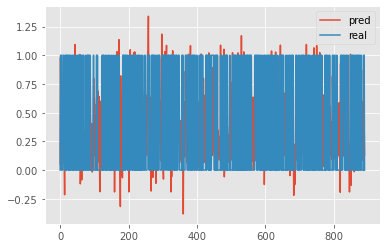

In [23]:
pred = pd.DataFrame({
    'pred': model.predict(x_final),
    'real': y})
pred.plot()